In [5]:
import pandas as pd
import numpy as np

In [7]:
# Load the datset
df = pd.read_csv('C:/Users/avsma/OneDrive/Documents/FDS/archive (8)/used_car_price_dataset_extended.csv')

In [9]:
# First few rows
df.head()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,NaN,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,NaN,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes


In [11]:
# Last few rows
df.tail()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
9995,1996,15.25,1500,Petrol,2,5498.71,Hyundai,Manual,Silver,NaN,0,Yes
9996,1997,14.45,5000,Diesel,1,9588.31,Honda,Manual,Gray,Full,0,Yes
9997,2002,19.41,1000,Diesel,4,4557.10,Kia,Manual,Black,Full,0,Yes
9998,2005,12.95,4000,Petrol,5,7413.59,BMW,Automatic,Blue,Full,0,Yes
9999,2007,18.81,5000,Petrol,1,11634.09,BMW,Automatic,Silver,Full,0,Yes


In [13]:
# Summary
df.describe()

,make_year,mileage_kmpl,engine_cc,owner_count,price_usd,accidents_reported
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2009.206900,17.960753,2287.130000,3.003500,7179.754532,0.492200
std,8.373858,5.025486,1291.276927,1.418904,2795.270940,0.694109
min,1995.000000,5.000000,800.000000,1.000000,1000.000000,0.000000
25%,2002.000000,14.540000,1200.000000,2.000000,5176.547500,0.000000
50%,2009.000000,17.970000,1800.000000,3.000000,6961.260000,0.000000
75%,2016.000000,21.352500,3000.000000,4.000000,8993.732500,1.000000
max,2023.000000,35.000000,5000.000000,5.000000,17647.630000,5.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make_year           10000 non-null  int64  
 1   mileage_kmpl        10000 non-null  float64
 2   engine_cc           10000 non-null  int64  
 3   fuel_type           10000 non-null  object 
 4   owner_count         10000 non-null  int64  
 5   price_usd           10000 non-null  float64
 6   brand               10000 non-null  object 
 7   transmission        10000 non-null  object 
 8   color               10000 non-null  object 
 9   service_history     7962 non-null   object 
 10  accidents_reported  10000 non-null  int64  
 11  insurance_valid     10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB


In [17]:
df.columns

Index(['make_year', 'mileage_kmpl', 'engine_cc', 'fuel_type', 'owner_count',
       'price_usd', 'brand', 'transmission', 'color', 'service_history',
       'accidents_reported', 'insurance_valid'],
      dtype='object')

In [19]:
df.isnull().sum()

make_year                0
mileage_kmpl             0
engine_cc                0
fuel_type                0
owner_count              0
price_usd                0
brand                    0
transmission             0
color                    0
service_history       2038
accidents_reported       0
insurance_valid          0
dtype: int64

In [21]:
df['service_history'] = df['service_history'].replace('None', np.nan)

In [23]:
df['service_history'] = df['service_history'].fillna(df['service_history'].mode()[0])

In [25]:
print(df['service_history'].unique())

['Full' 'Partial']


In [27]:
df['service_history'].value_counts()

service_history
Full       7025
Partial    2975
Name: count, dtype: int64

In [29]:
categorical_columns = ['fuel_type', 'brand', 'transmission', 'color', 'service_history', 'insurance_valid']
for col in categorical_columns:
    df[col] = df[col].str.strip().str.title()

In [31]:
df = df[(df['mileage_kmpl']>3) & (df['mileage_kmpl']<50)]
df = df[(df['engine_cc']>=600) & (df['engine_cc']<=5000)]

In [33]:
df.to_csv('cleaned_used_car_data.csv', index=False)

In [35]:
import IPython
from IPython.display import FileLink

FileLink("cleaned_used_car_data.csv")

C:\Users\avsma\cleaned_used_car_data.csv

In [37]:
print("Cleaned Data Overview:")
df.info()

Cleaned Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make_year           10000 non-null  int64  
 1   mileage_kmpl        10000 non-null  float64
 2   engine_cc           10000 non-null  int64  
 3   fuel_type           10000 non-null  object 
 4   owner_count         10000 non-null  int64  
 5   price_usd           10000 non-null  float64
 6   brand               10000 non-null  object 
 7   transmission        10000 non-null  object 
 8   color               10000 non-null  object 
 9   service_history     10000 non-null  object 
 10  accidents_reported  10000 non-null  int64  
 11  insurance_valid     10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB


In [39]:
df.head()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,Full,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,Full,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,Bmw,Automatic,Black,Full,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes


In [41]:
# Data Visualizations

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

In [133]:
sns.set(style="whitegrid")

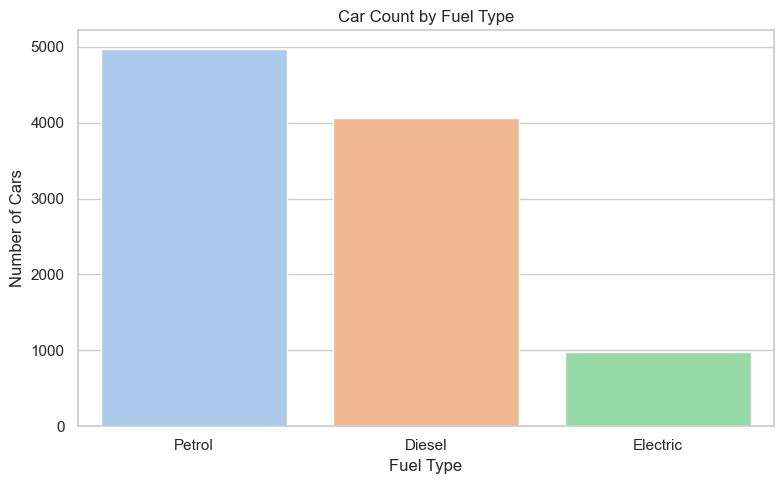

In [135]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='fuel_type', hue='fuel_type', palette='pastel', legend=False)
plt.title('Car Count by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Cars')
plt.tight_layout()
plt.show()

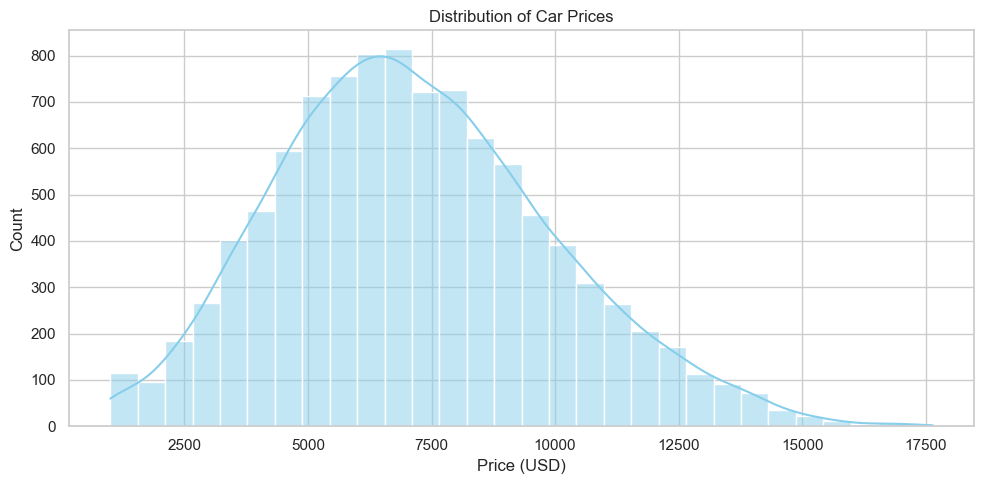

In [137]:
# Histogram
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='price_usd', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

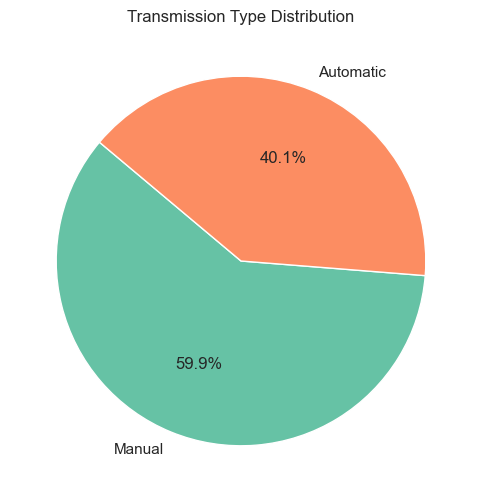

In [139]:
# Pie chart
trans_counts = df['transmission'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(trans_counts, labels=trans_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2')) 
plt.title('Transmission Type Distribution')
plt.show()

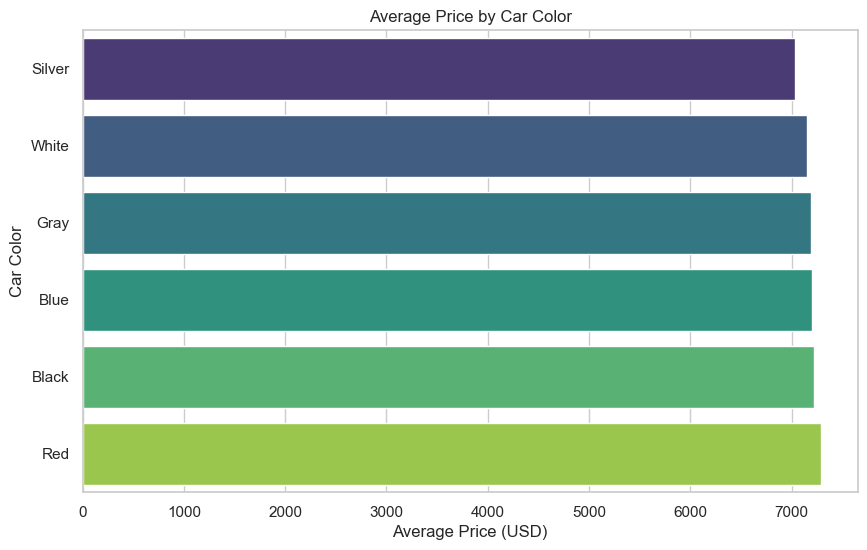

In [141]:
# Bar plot
avg_price_by_color = df.groupby('color')['price_usd'].mean().sort_values()
plt.figure(figsize=(10,6))
sns.barplot(x=avg_price_by_color.values, y=avg_price_by_color.index, hue=avg_price_by_color.index, palette='viridis', legend=False)
plt.title('Average Price by Car Color')
plt.xlabel('Average Price (USD)')
plt.ylabel('Car Color')
plt.show()

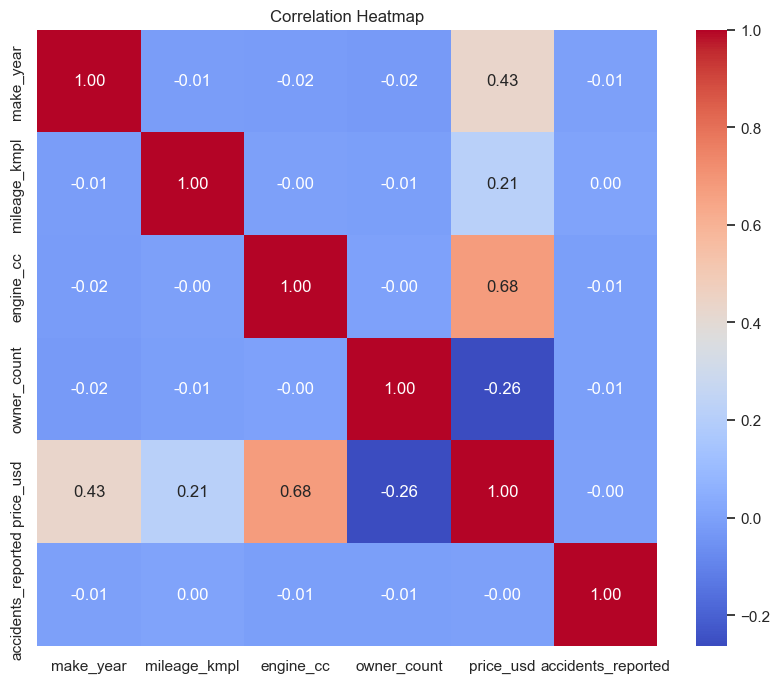

In [143]:
# Heat map
plt.figure(figsize=(10,8))
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

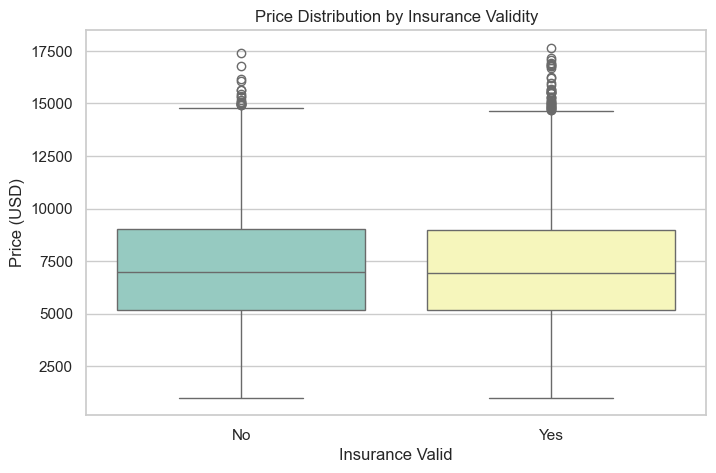

In [145]:
# Box plot
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='insurance_valid', y='price_usd', hue='insurance_valid', palette='Set3', legend=False)
plt.title('Price Distribution by Insurance Validity')
plt.xlabel('Insurance Valid')
plt.ylabel('Price (USD)')
plt.show()

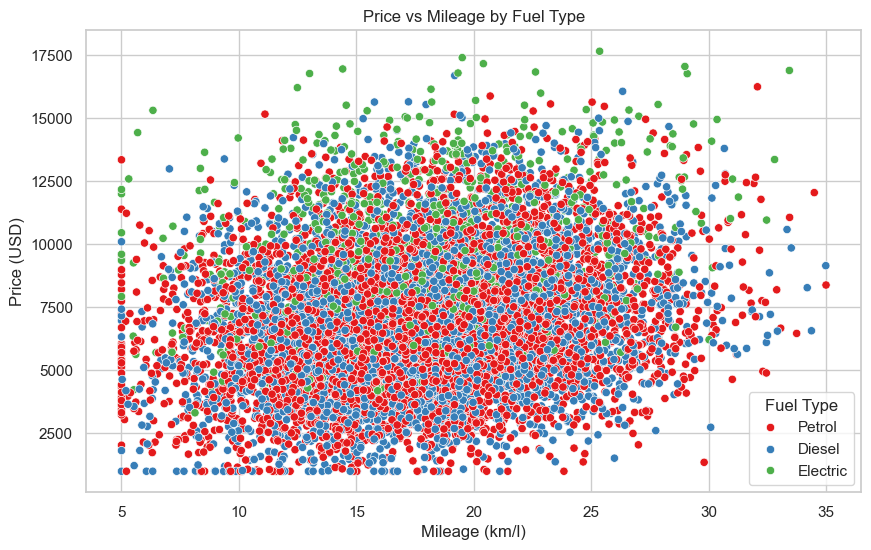

In [147]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='mileage_kmpl', y='price_usd', hue='fuel_type', palette='Set1')
plt.title('Price vs Mileage by Fuel Type')
plt.xlabel('Mileage (km/l)')
plt.ylabel('Price (USD)')
plt.legend(title='Fuel Type')
plt.show()

In [149]:
# Price Prediction

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [153]:
# Features and target
X = df.drop('price_usd', axis=1)
y = df['price_usd']

In [155]:
# defining numerical and categorical features
numeric_features = ['make_year', 'mileage_kmpl', 'engine_cc', 'owner_count', 
                    'accidents_reported']
categorical_features = ['fuel_type', 'brand', 'transmission', 'color', 'service_history', 'insurance_valid']


In [157]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [159]:
# Complete pipeline with model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [161]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [163]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['make_year', 'mileage_kmpl',
                                                   'engine_cc', 'owner_count',
                                                   'accidents_reported']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['fuel_type', 'brand',
                                                   'transmission', 'color',
                                                   'service_history',
                                                   'insurance_valid'])])),
                ('regressor', LinearRegression())])

In [165]:
# Evaualte the model
y_pred = model.predict(X_test)

In [167]:
print("Model Evaulation:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

Model Evaulation:
MAE: 790.80053985532
RMSE: 990.6202509368563
R2 Score: 0.8766481385882363


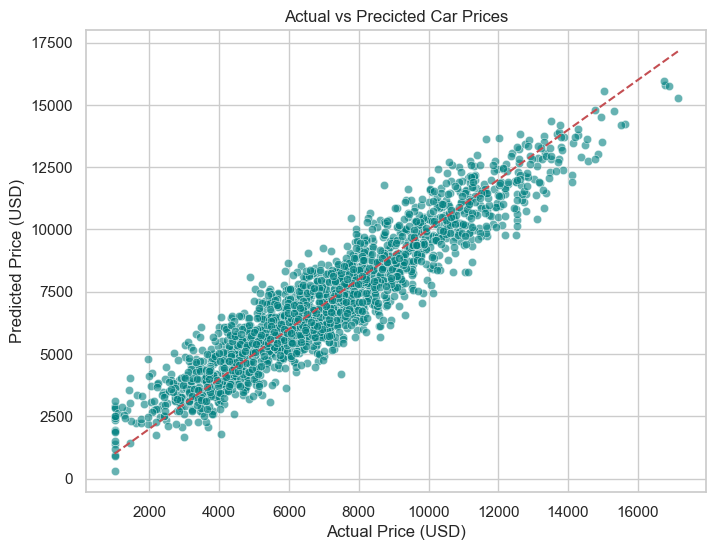

In [131]:
# Plot actual vs predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='teal', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Price (USD)')
plt.ylabel('Predicted Price (USD)')
plt.title('Actual vs Precicted Car Prices')
plt.show()

In [524]:
# defining the prediction function
def predict_price(make_year, mileage_kmpl, engine_cc, fuel_type, owner_count, brand, transmission, 
            color, service_history, accidents_reported, insurance_valid):
    input_data = pd.DataFrame([{
        'make_year': make_year,
        'mileage_kmpl': mileage_kmpl,
        'engine_cc': engine_cc,
        'fuel_type': fuel_type.title().strip(),
        'owner_count': owner_count,
        'brand': brand.title().strip(),
        'transmission': transmission.title().strip(),
        'color': color.title().strip(),
        'service_history': service_history.title().strip(),
        'accidents_reported': accidents_reported,
        'insurance_valid': insurance_valid.title()
    }])
    predicted_price = model.predict(input_data)[0]
    return round(predicted_price, 2)

In [532]:
predict_price(1997,19.6,800,'Petrol',1,'Kia','Automatic','Black','Partial',0,'Yes')

4044.87

In [534]:
predict_price(2000,8.96,2000,'Petrol',4,'Volkswagen','Automatic','Gray','Full',0,'No')

3571.48